In [1]:
import numpy as np
import sqlite3 
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

In [2]:
#con = sqlite3.connect("baseline_v4.1_1yrs.db")
con = sqlite3.connect("dyn_pair_v4.1_1yrs.db")

data = pd.read_sql("select rotTelPos,filter,scheduler_note,night,fieldRA,fieldDec,rotSkyPos,observationStartMJD,rotSkyPos_desired,rotTelPos_backup from observations where night < 366;", con)
con.close()
rot_all = 0
for night in np.unique(data["night"]):
    good = np.where(data["night"].values == night)[0]
    dff = np.diff(data["rotTelPos"].values[good])
    rot_all += np.sum(np.abs(dff))
rot_all

197321.09179373228

In [25]:
con = sqlite3.connect("baseline_v4.1_1yrs.db")

data = pd.read_sql("select rotTelPos,filter,scheduler_note,night,fieldRA,fieldDec,rotSkyPos,observationStartMJD,rotSkyPos_desired,rotTelPos_backup from observations where night < 366;", con)
con.close()
rot_all = 0
for night in np.unique(data["night"]):
    good = np.where(data["night"].values == night)[0]
    dff = np.diff(data["rotTelPos"].values[good])
    rot_all += np.sum(np.abs(dff))
rot_all

190310.19276898945

In [27]:
con = sqlite3.connect("../technical/rot_check/rot_simple_v4.1_10yrs.db")

data = pd.read_sql("select rotTelPos,filter,scheduler_note,night,fieldRA,fieldDec,rotSkyPos,observationStartMJD,rotSkyPos_desired,rotTelPos_backup from observations where night < 366;", con)
con.close()
rot_all = 0
for night in np.unique(data["night"]):
    good = np.where(data["night"].values == night)[0]
    dff = np.diff(data["rotTelPos"].values[good])
    rot_all += np.sum(np.abs(dff))
rot_all

12546.162341491046

In [3]:
ack = data['rotTelPos'].values[1:] - data['rotTelPos'].values[0:-1]

In [4]:
sf = np.where( (data["filter"].values[1:] == data["filter"].values[0:-1]) &
              ((data["scheduler_note"].values[1:] == data["scheduler_note"].values[0:-1])))

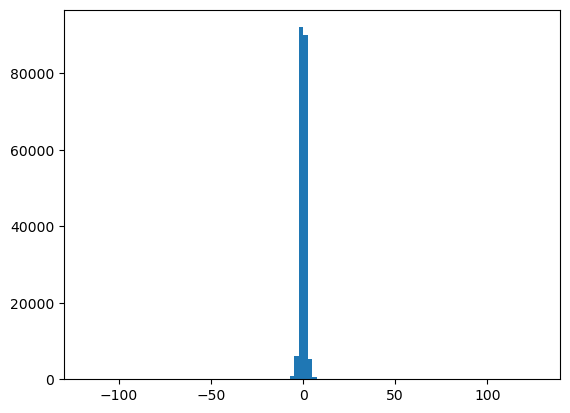

In [5]:
_temp = plt.hist(ack[sf], bins=100)

In [6]:
ack[sf].min()

-117.47731939111233

In [7]:
np.where(np.abs(ack[sf]) > 20.)[0].size

274

In [8]:
np.where(np.abs(ack[sf]) > 30.)[0]

array([   839,    849,    850,    851,    852,   2979,  18317,  19169,
        19219,  20461,  22223,  25229,  25230,  25231,  25239,  25243,
        25244,  25428,  34806,  34807,  34808,  35346,  35348,  35349,
        35350,  39172,  42748,  42749,  42750,  44577,  44862,  44872,
        45479,  45980,  45981,  45982,  49333,  49334,  54322,  54328,
        54331,  54335,  55743,  55754,  56504,  56540,  56545,  56546,
        61738,  70032,  72509,  73573,  73574,  76926,  76927,  76929,
        76937,  78183,  78233,  80426,  82249,  83386,  89214,  89215,
        89216,  89219,  89220,  90689,  90690,  94345,  96514,  99334,
        99337, 100832, 101107, 107144, 107147, 107148, 110723, 112372,
       112373, 112379, 112392, 115592, 115689, 115690, 121247, 121250,
       123925, 123941, 124073, 129288, 129289, 129290, 129291, 134211,
       134214, 134885, 137748, 154815, 154816, 154820, 154825, 154828,
       154833, 154834, 154835, 157264, 157269, 157270, 162454, 162461,
      

In [9]:
data["night"].values[sf[0][839]]

1

In [10]:
in_night = np.where(data["night"] == 1)[0]

In [11]:
np.abs(np.diff(data["rotTelPos"].values[in_night])).max()

78.03989539506372

In [12]:
np.where(np.abs(np.diff(data["rotTelPos"].values[in_night])) > 30)

(array([249, 259, 260, 261, 262, 265]),)

In [13]:
data.iloc[in_night[249]]

rotTelPos                   -9.912115
filter                              z
scheduler_note         pair_15, iz, b
night                               1
fieldRA                    169.532671
fieldDec                   -13.931951
rotSkyPos                   48.745232
observationStartMJD      60797.127056
rotSkyPos_desired          129.245814
rotTelPos_backup             -9.77945
Name: 866, dtype: object

In [15]:
data.iloc[in_night[258]]

rotTelPos                  -79.795892
filter                              z
scheduler_note         pair_15, iz, b
night                               1
fieldRA                    175.155715
fieldDec                    -7.233433
rotSkyPos                  131.373964
observationStartMJD      60797.131283
rotSkyPos_desired          131.373964
rotTelPos_backup             -9.77945
Name: 875, dtype: object

In [16]:
data.iloc[in_night[259]]

rotTelPos                  -84.050434
filter                              z
scheduler_note         pair_15, iz, b
night                               1
fieldRA                    173.319874
fieldDec                    -9.460221
rotSkyPos                   130.84067
observationStartMJD       60797.13173
rotSkyPos_desired           130.84067
rotTelPos_backup             -9.77945
Name: 876, dtype: object

In [37]:
data.iloc[in_night[307]]

rotTelPos                   16.573462
filter                              g
scheduler_note         pair_33, gr, a
night                               3
fieldRA                    172.320833
fieldDec                   -16.432654
rotSkyPos                   28.611038
observationStartMJD      60799.104461
rotSkyPos_desired           28.611038
rotTelPos_backup            31.578885
Name: 2654, dtype: object

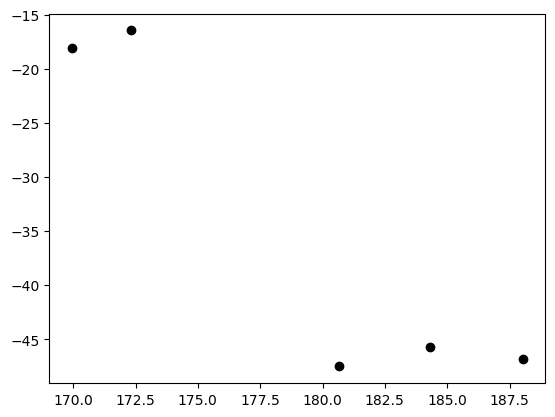

In [38]:
indx = in_night[np.arange(303,308,1)]
plt.plot(data["fieldRA"].values[indx], data["fieldDec"].values[indx], 'ko')

In [39]:
np.diff(data["observationStartMJD"].values[indx])*24*3600

array([ 44.31544247,  40.03601675, 107.1180772 ,  38.95493166])

In [40]:
data["rotSkyPos_desired"].values[indx]

array([-118.93126147, -140.66891998, -130.5478396 ,   19.65289088,
         28.61103776])

In [41]:
data["rotSkyPos"].values[indx]

array([-118.93126147, -140.66891998, -130.5478396 ,   19.65289088,
         28.61103776])

In [42]:
data["rotTelPos"].values[indx]

array([49.04424753, 50.52756676, 52.73086906, 19.18014929, 16.57346214])

In [22]:
data["rotTelPos_backup"].values[indx]

array([31.57888465, 31.57888465, 31.57888465, 31.57888465, 31.57888465])